<a href="https://colab.research.google.com/github/krishnaagarwal1feb/machine-learning/blob/master/data_science_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7COM1074 Applied Data Science and Analytics
# Coursework 2 - Data Science Campaign.

Provided is this jupyter notebook. Contained are all instructions necessary to complete the assignment.

This assignment is weighted with 30% of the total marks you can score in this module.

## What to submit
You must submit two files:
1. this notebook, completed, in .ipynb format.
2. This notebook, completed, in .html format. 

Use File -> download as... -> HTML in the jupyter notebook menu bar to save this notebook in html format.

## Marking criteria 
A total of 100 marks can be obtained. 10 marks are obtained when submitting a notebook that runs without errors on an anaconda installation such as installed on the UH practical machines. The remaining 90 marks are distributed as indicated in the tasks.

**Only answers with correct code will be marked. Any parts that do not run because of coding errors will receive zero marks. This includes cells that do not run because previous cells contained errors. Please test your notebook before submitting.** You can use "Kernel" -> "Restart & Run All" in the jupyter notebook menu bar. 

## Problem statement
You will work on a a dataset about diabetes hospital re-admittance. The dataset is available via canvas as part of this assignment. [Diabetes](https://www.niddk.nih.gov/health-information/diabetes) is the condition when the body loses its ability to process glucose. It is often associated with overconsumption of food, and obesity. But there are also genetic factors that can cause the disease.  

The dataset is a CSV file. 

It contains seven features. It also contains one dependent variable, 'Outcome'.

### Task 1 - Load the data (5 marks)
Use pandas to load the provided csv file. 

Use the `DataFrame.head` command to show the first 10 rows of the data set. 

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes_assignment.csv')
df.head(10)

,no. pregnancies,blood glucose level,blood pressure,thickness of skin,insulin level,body mass index,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
5,5,116,74,0,0,25.6,30,0
6,3,78,50,32,88,31.0,26,1
7,10,115,0,0,0,35.3,29,0
8,2,197,70,45,543,30.5,53,1
9,8,125,96,0,0,0.0,54,1


### Task 2 - Normalisation and PCA (20 marks)
Perform a PCA on the data set. Perform the PCA on the correlation matrix, not the covariance matrix. Exclude the dependent variable from processing. The result should contain the maximum number of Principal Components possible. 

Make a DataFrame that contains the result of the PCA in the first *n* columns, *n* being the number of Principal Components. Columns should be named "PC 1" to "PC *n*".
The last column of the data frame should contain the unprocessed dependent variable. Name the column according to the dependent variable. 

Use the `DataFrame.head` function to display the 10 first rows of the dataset. 



In [ ]:
# Code for task 2.1 here 
from sklearn import preprocessing
X = df.drop('Outcome',1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']

principalDf['Outcome'] = df['Outcome']
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Outcome
0,-1.087721,1.174722,-0.119842,0.187214,0.403914,0.912136,0.960333,1
1,1.122211,-0.649580,-0.759920,0.396504,-0.406933,0.756196,0.339018,0
2,0.431746,1.764536,1.527202,-0.868216,0.012326,-1.073746,1.094932,1
3,1.019234,-1.277338,-0.322285,0.251007,-0.488045,-0.100959,-0.135387,0
4,-0.730961,-1.618453,0.840613,0.049367,1.521805,0.976127,-0.296564,1
...,...,...,...,...,...,...,...,...
763,-2.030683,1.579471,-0.488243,2.449023,-0.198334,1.040842,-0.167900,0
764,0.047386,-0.673599,-0.616079,-0.522286,0.514129,0.127509,0.461957,0
765,0.100390,0.027564,0.246997,0.415480,-0.614808,-0.389015,0.291289,0
766,0.925351,0.933430,0.425492,-0.961394,0.175527,1.163826,-0.557371,1


### Task 3 - PCA Scatter plot and interpretation (15 marks)

Make a scatter plot of the first two principal components. Use small dots as markers. Color the dots according to the dependent variable. Use different colors for all discrete values of the dependent variable. Add a legend to the plot that explains which color is associated with which value of the dependent variable. Label the axes accordingly.

Interpret the findings: By visual inspection, which principal component gives a better separation of the dependent variable? Justify your answer. Three sentences maximum. 



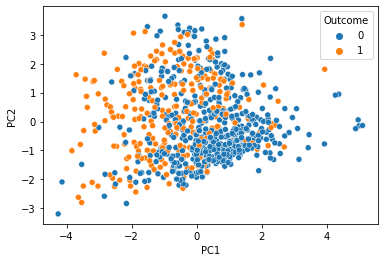

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot(x = principalDf['PC1'], y = principalDf['PC2'], hue = principalDf['Outcome'])

**Interpretation**:

 *PC1 can give better seperation for the outcome, because as we move towards the direction of PC1 we can observe dense clusters are formed , while in PC2 direction the data is more distributed and strong clusters are not formed due to more variance in PC2 *

### Task 4 - Covariance/correlation matrix and interpretation (20 marks)
Plot the covariance/correlation matrix as an image. 
Use a divergent colormap and center it on zero. 
Display a colorbar. 
Label each row and column according to the feature they represent, i.e. set the xticklabels and yticklabels accordingly. 
Rotate the labels on the columns by 90 degress to make sure they are legible. 

Interpret the result: Name the three pairs of features with the highest correlation. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

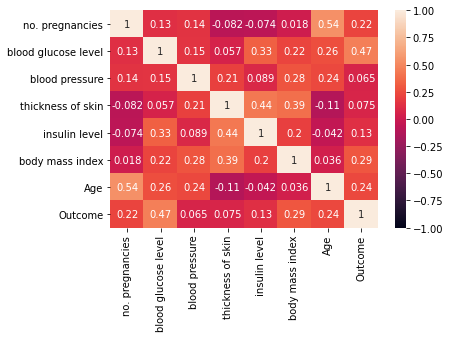

In [60]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

In [61]:

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations
no. pregnancies      Age              0.544341
blood glucose level  Outcome          0.466581
thickness of skin    insulin level    0.436783
dtype: float64


**Interpretation:** Most correlated feature pairs:

no. pregnancies   ,   Age            :   0.544341

blood glucose level , Outcome        :   0.466581

thickness of skin  ,  insulin level  :  0.436783

### Task 5 - component matrix and interpretation (20 marks)

Plot the PCA component matrix as an image. Use a diverging colormap. Center it on zero. Display a colorbar. Use labels for rows and columns to indicate which PC or feature the row or column refers to. Make sure all labels are legible. 

Interpret the component matrix, taking your observation from the scatter plot into account. Which features are most likely to be correlated with the outcome? Justify your answer. Five sentences maximum.



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

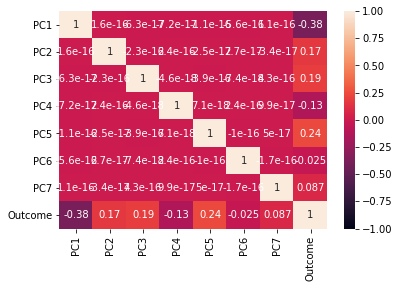

In [ ]:
sns.heatmap(principalDf.corr(), vmin=-1, vmax=1, annot=True)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)



**Interpretation:** 

Top Correlations:

PC1  Outcome    -0.38

PC5  Outcome    0.24

PC3  Outcome    0.19


By observing components with maximum correlation to the Outcome we can observe that PC1, PC5 and PC3 have most impact on the OUTCOME/ target variable 
PC1 has negative correlation thus having inverse effect on our outcome. Respectively PC5 , PC3 are positively correlated to target 

### Task 6 - Scree plot and interpretation (10 marks)

Plot the explained variance ratio against the number of Principal Components ("scree plot"). Use 'x' as a marker and a dashed line, both colored black. Label the axes accordingly. Set the y-axis limit such that it covers the whole range of values, starting at zero.  

Interpret the findings: What fraction of the total variance do the first two PCs explain? How many PCs are required to explain 95% of the variance? Feel free to use extra code to provide exact answers. 



In [119]:
eig_val_cov, eig_vec_cov = np.linalg.eig(principalDf.drop('Outcome',1).cov())

for i in range(len(eig_val_cov)):
  eigvec_cov = eig_vec_cov[:, i].T
  print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))

Eigenvalue 1: 2.013624858044095
Eigenvalue 2: 1.717528655315079
Eigenvalue 3: 0.42413089794663533
Eigenvalue 4: 0.4050180680844608
Eigenvalue 5: 0.6851931393209626
Eigenvalue 6: 0.7654149021598735
Eigenvalue 7: 0.9982159458824754


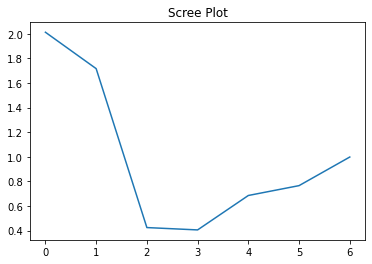

[2.01362486 1.71752866 0.4241309  0.40501807 0.68519314 0.7654149
 0.99821595]


In [98]:
plt.plot(eig_val_cov)
plt.title('Scree Plot')
plt.show()
print(eig_val_cov)

In [118]:
print("the first two principal components explain : ", pca.explained_variance_ratio_[:2].cumsum()[1]*100 , "% variance ")

the first two principal components explain :  53.23278915079028 % variance 


In [96]:
df.corrwith(df['Outcome']).sort_values(ascending=False)


Outcome                1.000000
blood glucose level    0.466581
body mass index        0.292695
Age                    0.238356
no. pregnancies        0.221898
insulin level          0.130548
thickness of skin      0.074752
blood pressure         0.065068
pca1                  -0.645099
dtype: float64

In [109]:
pc95 = PCA(n_components = 0.95)
pc95.fit(X_scaled)
x_pc95 = pc95.transform(X_scaled)
x_pc95.shape
#since the shape of the new pca has 95% variance with 7 features , thus I can assume to use these 7 features to preserve 95% variance 

(768, 7)

**Interpretation**: (replace 'X' with your answer).

The first two principal components explain *53.23* % of the variance.

*7* principal components are required to explain 95 % of the total variance. 
